In [1]:
from __future__ import print_function
from __future__ import division
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
#from tensorboardX import SummaryWriter  # for pytorch below 1.14
from torch.utils.tensorboard import SummaryWriter # for pytorch above or equal 1.14
import matplotlib.pyplot as plt
import numpy as np

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Quesion 1
Add a batch normalization layer after the first fully-connected layer(fc1) (8 points).
Save the model after training(Checkout our tutorial on how to save your model).
Becareful that batch normalization layer performs differently between training and evalation process, make sure you understand how to convert your model between training mode and evaluation mode(you can find hints in my code).
Observe the difference of final training/testing accuracy with/without batch normalization layer.

In [2]:
# Question1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.batchnorm = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.batchnorm(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Question 2
Modify our model by adding another fully connected layer with 512 nodes at the second-to-last layer (before the fc2 layer) (8 points).
Apply the model weights you saved at step 1 to initialize to the new model(only up to fc2 layer since after that all layers are newly created) before training. Train and save the model (Hint: check the end of the assignment description to see how to partially restore weights from a pretrained weights file).

In [14]:
# Question 2
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.batchnorm = nn.BatchNorm1d(512)
        self.fc_additional = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.batchnorm(x)
        x = F.relu(x)
        x = F.relu(self.fc_additional(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Question 4
Try to tune your network in another way (e.g. add/remove a layer, change the activation function, add/remove regularizer, change the number of hidden units, more batch normalization layers) not described in the previous four. You can start from random initialization or previous results as you wish (8 points).

In [8]:
# Question 4
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.batchnorm = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool(x)
        x = self.conv5(x)
        x = F.relu(self.bn5(x))
        x = self.conv6(x)
        x = F.relu(self.bn6(x))
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = F.relu(self.batchnorm(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [3]:
def eval_net(dataloader):
    correct = 0
    total = 0
    total_loss = 0
    net.eval() # Why would I do this?
    criterion = nn.CrossEntropyLoss(reduction='mean')
    for data in dataloader:
        images, labels = data
        images, labels = Variable(images).cuda(), Variable(labels).cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.data).sum()
        loss = criterion(outputs, labels)
        total_loss += loss.item()
    net.train() # Why would I do this?
    return total_loss / total, correct.float() / total

In [4]:
BATCH_SIZE = 32 #mini_batch size
MAX_EPOCH = 10 #maximum epoch to train

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #torchvision.transforms.Normalize(mean, std)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
EXPT = input("Experiment>> ")
print('Building model...')
net = Net().cuda()
net.train() # Why would I do this?
#print(net.state_dict()['conv1.weight'])

writer = SummaryWriter(log_dir=f'./log1/{EXPT}')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

print('Start training...')
for epoch in range(MAX_EPOCH):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('    Step: %5d avg_batch_loss: %.5f' %
                  (i + 1, running_loss / 500))
            running_loss = 0.0
    print('    Finish training this EPOCH, start evaluating...')
    train_loss, train_acc = eval_net(trainloader)
    test_loss, test_acc = eval_net(testloader)
    print('EPOCH: %d train_loss: %.5f train_acc: %.5f test_loss: %.5f test_acc %.5f' %
          (epoch+1, train_loss, train_acc, test_loss, test_acc))

    writer.add_scalars("accuracy", {
            "train": train_acc,
            "test": test_acc
        }, epoch + 1)
    writer.add_scalars("loss", {
            "train": train_loss,
            "test": test_loss
        }, epoch + 1)

writer.close()
print('Finished Training')
print('Saving model...')
torch.save(net.state_dict(), f'mytraining_{EXPT}.pth')

Experiment>>  q1


Building model...
Start training...
    Step:   500 avg_batch_loss: 1.61734
    Step:  1000 avg_batch_loss: 1.23684
    Step:  1500 avg_batch_loss: 1.05068
    Finish training this EPOCH, start evaluating...
EPOCH: 1 train_loss: 0.02841 train_acc: 0.67372 test_loss: 0.03099 test_acc 0.64710
    Step:   500 avg_batch_loss: 0.90100
    Step:  1000 avg_batch_loss: 0.84492
    Step:  1500 avg_batch_loss: 0.81833
    Finish training this EPOCH, start evaluating...
EPOCH: 2 train_loss: 0.02238 train_acc: 0.75094 test_loss: 0.02718 test_acc 0.70260
    Step:   500 avg_batch_loss: 0.66649
    Step:  1000 avg_batch_loss: 0.65756
    Step:  1500 avg_batch_loss: 0.65642
    Finish training this EPOCH, start evaluating...
EPOCH: 3 train_loss: 0.01443 train_acc: 0.84382 test_loss: 0.02256 test_acc 0.75180
    Step:   500 avg_batch_loss: 0.51680
    Step:  1000 avg_batch_loss: 0.50869
    Step:  1500 avg_batch_loss: 0.54060
    Finish training this EPOCH, start evaluating...
EPOCH: 4 train_loss: 0.0

In [15]:
# Question 2
EXPT = input("Experiment>> ")
print('Building model...')
net = Net().cuda()
net.train() # Why would I do this?
#print(net.state_dict()['conv1.weight'])

pretrained_dict = torch.load('mytraining_q1.pth')
model_dict = net.state_dict()
temp = {key: val for key, val in pretrained_dict.items() if key in model_dict}
model_dict.update(temp)
net.load_state_dict(model_dict)
'''
for key in model_dict:
    if key in pretrained_dict and key != 'fc2.weight' and key != 'fc2.bias':
        model_dict[key] = pretrained_dict[key]
net.load_state_dict(model_dict)
'''

writer = SummaryWriter(log_dir=f'./log1/{EXPT}')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

print('Start training...')
for epoch in range(MAX_EPOCH):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('    Step: %5d avg_batch_loss: %.5f' %
                  (i + 1, running_loss / 500))
            running_loss = 0.0
    print('    Finish training this EPOCH, start evaluating...')
    train_loss, train_acc = eval_net(trainloader)
    test_loss, test_acc = eval_net(testloader)
    print('EPOCH: %d train_loss: %.5f train_acc: %.5f test_loss: %.5f test_acc %.5f' %
          (epoch+1, train_loss, train_acc, test_loss, test_acc))

    writer.add_scalars("accuracy", {
            "train": train_acc,
            "test": test_acc
        }, epoch + 1)
    writer.add_scalars("loss", {
            "train": train_loss,
            "test": test_loss
        }, epoch + 1)

writer.close()
print('Finished Training')
print('Saving model...')
torch.save(net.state_dict(), f'mytraining_{EXPT}.pth')

Experiment>>  q2


Building model...
Start training...
    Step:   500 avg_batch_loss: 0.36843
    Step:  1000 avg_batch_loss: 0.26802
    Step:  1500 avg_batch_loss: 0.25600
    Finish training this EPOCH, start evaluating...
EPOCH: 1 train_loss: 0.00481 train_acc: 0.94528 test_loss: 0.03417 test_acc 0.74240
    Step:   500 avg_batch_loss: 0.14396
    Step:  1000 avg_batch_loss: 0.16394
    Step:  1500 avg_batch_loss: 0.17870
    Finish training this EPOCH, start evaluating...
EPOCH: 2 train_loss: 0.00221 train_acc: 0.97552 test_loss: 0.03216 test_acc 0.76170
    Step:   500 avg_batch_loss: 0.10138
    Step:  1000 avg_batch_loss: 0.13342
    Step:  1500 avg_batch_loss: 0.13393
    Finish training this EPOCH, start evaluating...
EPOCH: 3 train_loss: 0.00176 train_acc: 0.98166 test_loss: 0.03270 test_acc 0.76580
    Step:   500 avg_batch_loss: 0.09261
    Step:  1000 avg_batch_loss: 0.09442
    Step:  1500 avg_batch_loss: 0.10423
    Finish training this EPOCH, start evaluating...
EPOCH: 4 train_loss: 0.0

# Question 3
Try to use an adaptive schedule to tune the learning rate, you can choose from RMSprop, Adagrad and Adam (Hint: you don't need to implement any of these, look at Pytorch documentation please) (8 points).

In [5]:
EXPT = input("Experiment>> ")
print('Building model...')
net = Net().cuda()
net.train() # Why would I do this?
#print(net.state_dict()['conv1.weight'])

writer = SummaryWriter(log_dir=f'./log1/{EXPT}')
criterion = nn.CrossEntropyLoss()
# Question 3
# torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.Adam(net.parameters(), lr=0.001)

print('Start training...')
for epoch in range(MAX_EPOCH):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('    Step: %5d avg_batch_loss: %.5f' %
                  (i + 1, running_loss / 500))
            running_loss = 0.0
    print('    Finish training this EPOCH, start evaluating...')
    train_loss, train_acc = eval_net(trainloader)
    test_loss, test_acc = eval_net(testloader)
    print('EPOCH: %d train_loss: %.5f train_acc: %.5f test_loss: %.5f test_acc %.5f' %
          (epoch+1, train_loss, train_acc, test_loss, test_acc))

    writer.add_scalars("accuracy", {
            "train": train_acc,
            "test": test_acc
        }, epoch + 1)
    writer.add_scalars("loss", {
            "train": train_loss,
            "test": test_loss
        }, epoch + 1)

writer.close()
print('Finished Training')
print('Saving model...')
torch.save(net.state_dict(), f'mytraining_{EXPT}.pth')

Experiment>>  q3_1


Building model...
Start training...
    Step:   500 avg_batch_loss: 1.76588
    Step:  1000 avg_batch_loss: 1.38661
    Step:  1500 avg_batch_loss: 1.16557
    Finish training this EPOCH, start evaluating...
EPOCH: 1 train_loss: 0.03253 train_acc: 0.62890 test_loss: 0.03440 test_acc 0.61310
    Step:   500 avg_batch_loss: 0.99276
    Step:  1000 avg_batch_loss: 0.93669
    Step:  1500 avg_batch_loss: 0.90160
    Finish training this EPOCH, start evaluating...
EPOCH: 2 train_loss: 0.02426 train_acc: 0.72760 test_loss: 0.02852 test_acc 0.69230
    Step:   500 avg_batch_loss: 0.78275
    Step:  1000 avg_batch_loss: 0.77030
    Step:  1500 avg_batch_loss: 0.76197
    Finish training this EPOCH, start evaluating...
EPOCH: 3 train_loss: 0.01950 train_acc: 0.78072 test_loss: 0.02627 test_acc 0.71730
    Step:   500 avg_batch_loss: 0.63694
    Step:  1000 avg_batch_loss: 0.66605
    Step:  1500 avg_batch_loss: 0.65120
    Finish training this EPOCH, start evaluating...
EPOCH: 4 train_loss: 0.0

In [6]:
def show_img(img):
    # unnormalize the images
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    return npimg # return the unnormalized images

Experiment>>  q6


Building model...
Start training...
    Step:   500 avg_batch_loss: 1.36614
    Step:  1000 avg_batch_loss: 0.96687
    Step:  1500 avg_batch_loss: 0.85083
    Finish training this EPOCH, start evaluating...
EPOCH: 1 train_loss: 0.02168 train_acc: 0.75790 test_loss: 0.02405 test_acc 0.72690
    Step:   500 avg_batch_loss: 0.71017
    Step:  1000 avg_batch_loss: 0.68878
    Step:  1500 avg_batch_loss: 0.63800
    Finish training this EPOCH, start evaluating...
EPOCH: 2 train_loss: 0.01538 train_acc: 0.82878 test_loss: 0.01975 test_acc 0.78850
    Step:   500 avg_batch_loss: 0.51434
    Step:  1000 avg_batch_loss: 0.52028
    Step:  1500 avg_batch_loss: 0.53537
    Finish training this EPOCH, start evaluating...
EPOCH: 3 train_loss: 0.01065 train_acc: 0.88656 test_loss: 0.01675 test_acc 0.81510
    Step:   500 avg_batch_loss: 0.37883
    Step:  1000 avg_batch_loss: 0.41057
    Step:  1500 avg_batch_loss: 0.41964
    Finish training this EPOCH, start evaluating...
EPOCH: 4 train_loss: 0.0

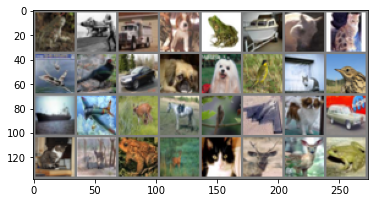

In [9]:
# Q4 and Q5
EXPT = input("Experiment>> ")
print('Building model...')
net = Net()
net.train() # Why would I do this?
#print(net.state_dict()['conv1.weight'])

writer = SummaryWriter(log_dir=f'./log1/{EXPT}')
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)
img_grid = show_img(img_grid)
writer.add_image('CIFAR10', img_grid, 0)
writer.add_graph(net, images)
net = net.cuda()

criterion = nn.CrossEntropyLoss()
# Question 3
# torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.Adam(net.parameters(), lr=0.001)

print('Start training...')
for epoch in range(MAX_EPOCH):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('    Step: %5d avg_batch_loss: %.5f' %
                  (i + 1, running_loss / 500))
            running_loss = 0.0
    print('    Finish training this EPOCH, start evaluating...')
    train_loss, train_acc = eval_net(trainloader)
    test_loss, test_acc = eval_net(testloader)
    print('EPOCH: %d train_loss: %.5f train_acc: %.5f test_loss: %.5f test_acc %.5f' %
          (epoch+1, train_loss, train_acc, test_loss, test_acc))

    writer.add_scalars("accuracy", {
            "train": train_acc,
            "test": test_acc
        }, epoch + 1)
    writer.add_scalars("loss", {
            "train": train_loss,
            "test": test_loss
        }, epoch + 1)
    writer.add_histogram("conv1.bias", net.conv1.bias, epoch + 1)
    writer.add_histogram("conv1.weight", net.conv1.weight, epoch + 1)
    writer.add_histogram("conv2.bias", net.conv2.bias, epoch + 1)
    writer.add_histogram("conv2.weight", net.conv2.weight, epoch + 1)


writer.close()
print('Finished Training')
print('Saving model...')
torch.save(net.state_dict(), f'mytraining_{EXPT}.pth')